Run A2C model learning


In [ ]:
import numpy as np
from stable_baselines3 import A2C, DQN
from utils.model import create_env, create_model
from utils.load_data import load_data

# from gym_anytrading import gym_anytrading

df = load_data('../csv_clean_5m/AAPL.csv')
# df = load_data('../csv_clean_5m/NVDA.csv')

# df2 = df.iloc[71800:-1]

# Impulse AAPL
# df = df.iloc[-520:-380]

env = create_env(df)
print("observation_space:", env.observation_space)


seed = np.random.seed()
env.reset(seed=seed)
agent_file_name = "_new_model"


loadfile = False
if loadfile:
    try:
        model = A2C.load(f"{agent_file_name}", env=env)
        print('model loaded successfully')
    except Exception as e:
        raise ValueError("Fail to load model")
else:
    model = create_model(env)

# Train the agent
total_timesteps = 1000
model = model.learn(total_timesteps=total_timesteps, progress_bar=True)

# Save the trained model with the current date in the filename
model.save(agent_file_name)

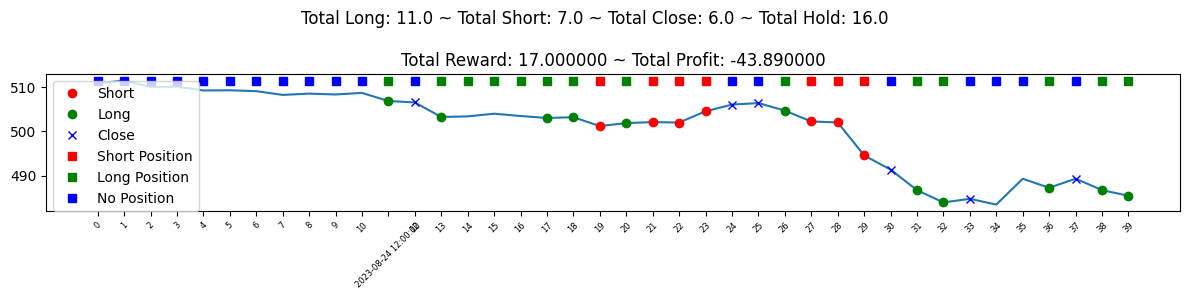

c:\Users\Admin\Documents\Dev\AI-elliott-wave\trade_learn_rl\env\custom_env.py:319: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(date_strings, rotation=0, fontsize=1)


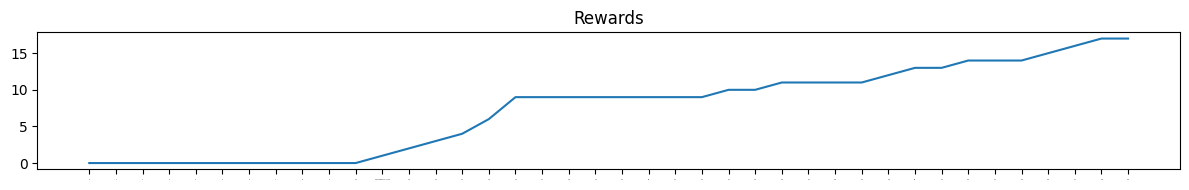

c:\Users\Admin\Documents\Dev\AI-elliott-wave\trade_learn_rl\env\custom_env.py:328: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(date_strings, rotation=0, ha='right', fontsize=1)


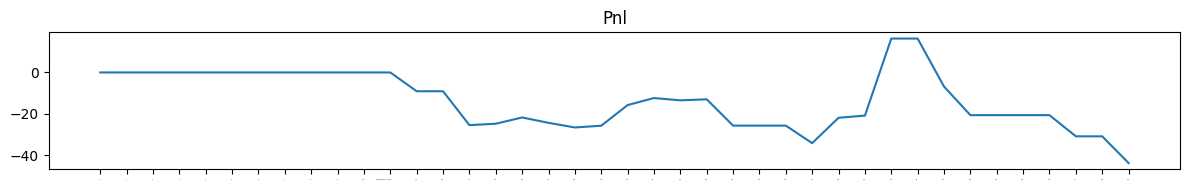

In [1]:
import numpy as np
from stable_baselines3 import A2C, DQN, PPO
from utils.load_data import load_data
from utils.model import create_env

df = load_data('../csv_clean_5m/NVDA.csv')
# df = load_data('../csv_clean_5m/AAPL.csv')
# df2 = df.iloc[-100:]
# df2 = df.iloc[-1720:-1480]
df2 = df.iloc[-120:-80]

env = create_env(df2)

seed = np.random.seed()
env.reset(seed=seed)

if 'model' in locals():
    del model

agent_file_name = "_new_model"
model = A2C.load(f"{agent_file_name}", env=env)
vec_env = model.get_env()
if vec_env is not None:
    total_num_episodes = 1

    for episode in range(total_num_episodes):
        obs = vec_env.reset()

        total_reward = 0
        done = False
        while not done:
            action, _states = model.predict(obs)
            obs, reward, done, info = vec_env.step(action)

            total_reward += reward
            if done:
                break

        vec_env.unwrapped.env_method('render')